<a href="https://colab.research.google.com/github/pablofdeziv/braille_neuronal/blob/main/BrailleNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset has already been extracted.


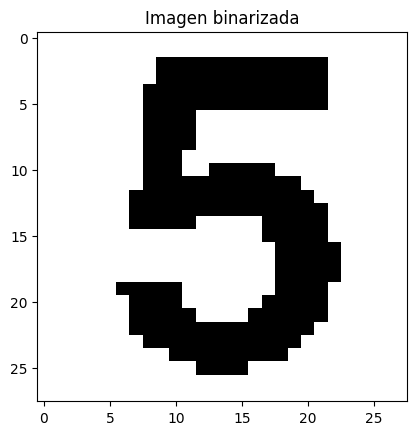

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The predicted number is: 5
Braille's representation: ⠑


In [ ]:
#!pip install opencv-python numpy matplotlib scikit-learn tensorflow keras extra-keras-datasets kagglehub
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Input
from keras.datasets import mnist
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
import kagglehub
import tarfile


if not os.path.exists('/content/chars74k'):
  # Download latest version
  path = kagglehub.dataset_download("supreethrao/chars74kdigitalenglishfont")

  print("Path to dataset files:", path)

  tgz_file_path = '/root/.cache/kagglehub/datasets/supreethrao/chars74kdigitalenglishfont/versions/3/EnglishFnt.tgz'
  with tarfile.open(tgz_file_path, 'r:gz') as tar_ref:
      tar_ref.extractall('/content/chars74k')
else:
    print("Dataset has already been extracted.")


def process_image(route_image):

  image = cv2.imread(route_image, cv2.IMREAD_COLOR) #leo la imagen

  image = cv2.resize(image, (28, 28)) #redimensiono la imagen

  image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #transformacion a escala de grises

  _, image_binary = cv2.threshold(image_grey, 127, 255, cv2.THRESH_BINARY) #binarizacion de la imagen

  #image_binary = cv2.bitwise_not(image_binary)

  pixeles = image_binary.reshape(1, 28*28) / 255.0  # Normalizar y aplanar la imagen

  plt.imshow(image_binary, cmap='gray')
  plt.title("Imagen binarizada")
  plt.show()

  return pixeles





#START OF THE PROGRAM

#pixels = process_image('/content/8.jpg') #imagen test post entrenamiento

pixels = process_image('/content/drive/MyDrive/NUMBERS/5.jpg') #imagen test post entrenamiento


# Verificar si el modelo ya existe
if os.path.exists('mi_modelo.h5'):
    model = load_model('mi_modelo.h5')
else:
  model = Sequential([
      Flatten(input_shape=(28, 28)),  # Aplana la entrada aquí
      Dense(128, activation='relu'),
      Dense(10, activation='softmax')
  ])


  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  base_path = '/content/chars74k/English/Fnt'
  sample_folders = [f'Sample{str(i).zfill(3)}' for i in range(1, 11)]  # Sample001 a Sample010

  # Inicializa listas para almacenar las imágenes y etiquetas
  images = []
  labels = []

  # Recorre las carpetas y carga las imágenes
  for label, folder in enumerate(sample_folders):
      folder_path = os.path.join(base_path, folder)
      for filename in os.listdir(folder_path):
          if filename.endswith('.png'):  # Asegúrate de que sean archivos PNG
              image_path = os.path.join(folder_path, filename)
              image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Cargar en escala de grises
              image = cv2.resize(image, (28, 28))  # Redimensionar a 28x28
              #image = cv2.bitwise_not(image) #invertir colores, blanco sobre negro
              _, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) #binarizar la imagen con umbral de 127
              image = image / 255.0  # Normalizar los valores de los píxeles
              images.append(image)
              labels.append(label)  # Etiqueta la imagen
              """plt.imshow(image, cmap='gray')
              plt.title("Imagen binarizada")
              plt.show()"""

  # Convierte las listas a arrays NumPy
  images = np.array(images)
  labels = np.array(labels)

  # Crea los conjuntos de entrenamiento y prueba
  x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

  x_train = x_train.reshape(-1, 28, 28, 1)
  x_test = x_test.reshape(-1, 28, 28, 1)


  model.fit(x_train, y_train, epochs=10, batch_size=32) #entrenar el modelo
  model.save('mi_modelo.h5')  # Guardar el modelo después de entrenarlo

  # Obtener las predicciones para el conjunto de prueba
  y_pred = model.predict(x_test)  # x_test debe ser la parte del dataset que usas para testing
  y_pred_classes = np.argmax(y_pred, axis=1)

  # Generar la matriz de confusión
  cm = confusion_matrix(y_test, y_pred_classes) # y_test son las etiquetas reales

  # Visualizar la matriz de confusión
  plt.figure(figsize=(10, 10))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predicciones")
  plt.ylabel("Valores reales")
  plt.title("Matriz de confusión")
  plt.show()


braille_dict = {
    0: "⠚",  # Braille para 0
    1: "⠁",  # Braille para 1
    2: "⠃",  # Braille para 2
    3: "⠉",  # Braille para 3
    4: "⠙",  # Braille para 4
    5: "⠑",  # Braille para 5
    6: "⠋",  # Braille para 6
    7: "⠛",  # Braille para 7
    8: "⠓",  # Braille para 8
    9: "⠊",  # Braille para 9
}

# Predecir un número de una imagen
pixels = pixels.reshape(1, 28, 28, 1)  # Agregar una dimensión extra (batch size = 1) # Asegúrate de que pixels tenga la forma correcta
prediction = model.predict(pixels)
#print(prediction)
predicted_number = np.argmax(prediction)

# Obtener la representación en Braille
braille_representation = braille_dict[predicted_number]

print("The predicted number is:", predicted_number)
print("Braille's representation:", braille_representation)



